<a href="https://colab.research.google.com/github/chandhinipj/Image-Recognition-DogCat-CNN/blob/main/DogCatImageClassificationUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import os
import pandas as pd
import numpy as np

import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras
from keras.layers import Dense, Dropout
import cv2
from skimage.feature import hog

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm

from random import randint
from random import seed

RANDOM_SEED = 100

Drive and file setup

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/data/imageclassificationCNN/dogs-vs-cats-vvsmall.zip', 'r') #Opens the zip file in read mode 
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
base_dir = '/tmp/dogs-vs-cats-vvsmall' 
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Drectory with the train cat images
train_cat_dir = os.path.join(train_dir, 'cats')

# Drectory with the train dogs images
train_dog_dir = os.path.join(train_dir, 'dogs')

# Drectory with the validation cat images
validation_cat_dir = os.path.join(validation_dir, 'cats')

# Drectory with the validation dogs images
validation_dog_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

validation_cat_hames = os.listdir(validation_cat_dir)
print(validation_cat_hames[:10])

validation_dog_names = os.listdir(validation_dog_dir)
print(validation_dog_names[:10])

['cat.1688.jpg', 'cat.2091.jpg', 'cat.2582.jpg', 'cat.2337.jpg', 'cat.2388.jpg', 'cat.1858.jpg', 'cat.2676.jpg', 'cat.1257.jpg', 'cat.686.jpg', 'cat.2479.jpg']
['dog.1538.jpg', 'dog.2857.jpg', 'dog.590.jpg', 'dog.1709.jpg', 'dog.334.jpg', 'dog.1782.jpg', 'dog.1674.jpg', 'dog.2475.jpg', 'dog.585.jpg', 'dog.321.jpg']
['cat.8788.jpg', 'cat.9091.jpg', 'cat.8840.jpg', 'cat.8637.jpg', 'cat.9247.jpg', 'cat.8930.jpg', 'cat.8809.jpg', 'cat.9229.jpg', 'cat.9345.jpg', 'cat.8541.jpg']
['dog.9166.jpg', 'dog.8656.jpg', 'dog.9348.jpg', 'dog.9151.jpg', 'dog.9340.jpg', 'dog.9100.jpg', 'dog.9232.jpg', 'dog.8630.jpg', 'dog.9204.jpg', 'dog.8553.jpg']


In [ ]:
# displaying the number of images in the directories
print('total training horse images:', len(os.listdir(train_cat_dir)))
print('total training human images:', len(os.listdir(train_dog_dir)))
print('total validation horse images:', len(os.listdir(validation_cat_dir)))
print('total validation human images:', len(os.listdir(validation_dog_dir)))

total training horse images: 3000
total training human images: 3000
total validation horse images: 900
total validation human images: 900


In [ ]:
# # unzip file
# import shutil
# shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/bee_dataset.zip', '/content/drive/MyDrive/Colab Note

# Load image data sets

In [ ]:
data_folder = '/tmp/dogs-vs-cats-vvsmall'

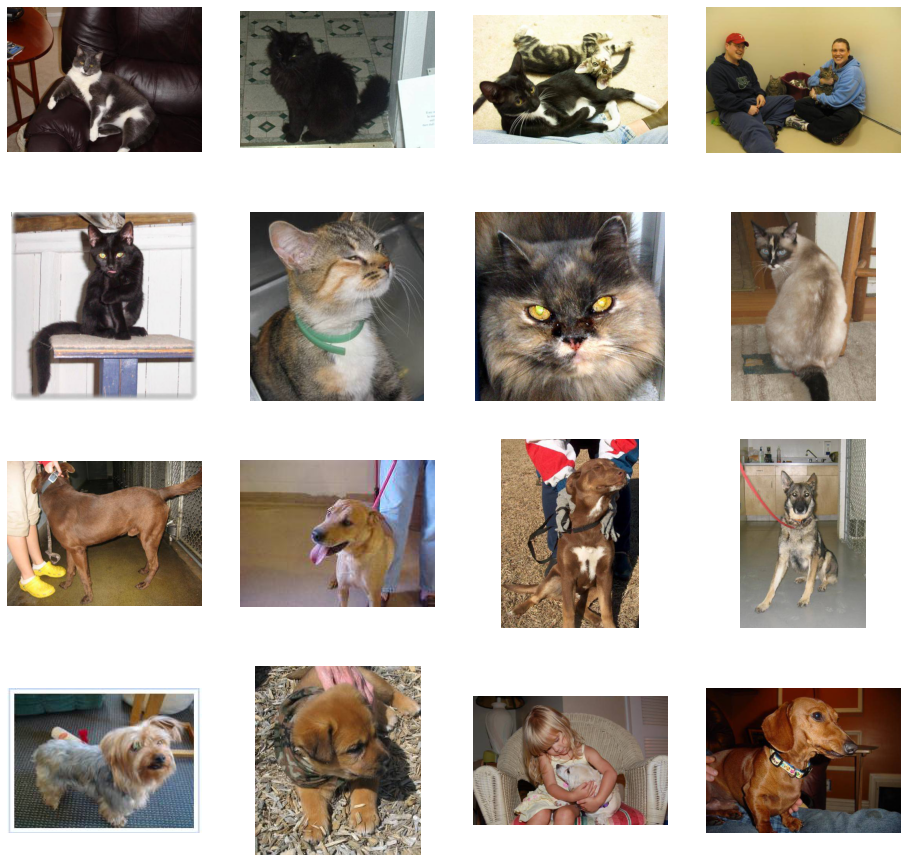

In [ ]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 cat pictures
#[print(e) for e in myList]
# for e in myList:
#    print(e)
next_horse_pix = [os.path.join(train_cat_dir, fname) for fname in train_cat_names[pic_index-8:pic_index]]

# pick the first 8 dog pictures
next_human_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

# add the horse and human pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Loading Train set dog Images

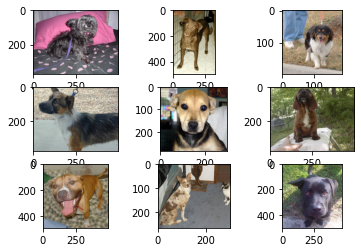

In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = data_folder+'/train/dogs/'
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # define filename
 filename = folder + 'dog.' + str(i) + '.jpg'
 # load image pixels
 image = imread(filename)
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

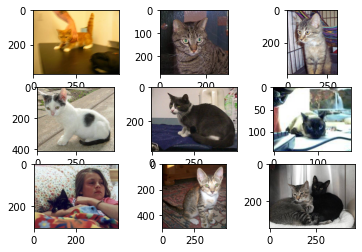

In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = data_folder+'/train/cats/'
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # define filename
 filename = folder + 'cat.' + str(i) + '.jpg'
 # load image pixels
 image = imread(filename)
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

# Generating Model

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   )
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/train/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/validation/',  # This is the source directory for validation images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 25, 25, 32)       

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(monitor = 'val_accuracy', patience = 3, restore_best_weights=True)
# learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.0001)
# callback = [earlystop,learning_rate_reduction]

In [ ]:
optimizser_adam= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=30,callbacks = earlystop
                    # epochs=30
                  )             
 

Epoch 1/30
188/188 [==============================] - 124s 655ms/step - loss: 0.6963 - accuracy: 0.5258 - val_loss: 0.6899 - val_accuracy: 0.5500
Epoch 2/30
188/188 [==============================] - 130s 691ms/step - loss: 0.6580 - accuracy: 0.5930 - val_loss: 0.6237 - val_accuracy: 0.6444
Epoch 3/30
188/188 [==============================] - 121s 645ms/step - loss: 0.5964 - accuracy: 0.6717 - val_loss: 0.6364 - val_accuracy: 0.6294
Epoch 4/30
188/188 [==============================] - 126s 669ms/step - loss: 0.5627 - accuracy: 0.7050 - val_loss: 0.5482 - val_accuracy: 0.7211
Epoch 5/30
188/188 [==============================] - 127s 671ms/step - loss: 0.5300 - accuracy: 0.7243 - val_loss: 0.5180 - val_accuracy: 0.7456
Epoch 6/30
188/188 [==============================] - 117s 620ms/step - loss: 0.5119 - accuracy: 0.7465 - val_loss: 0.5072 - val_accuracy: 0.7417
Epoch 7/30
188/188 [==============================] - 125s 667ms/step - loss: 0.4723 - accuracy: 0.7722 - val_loss: 0.4970 -

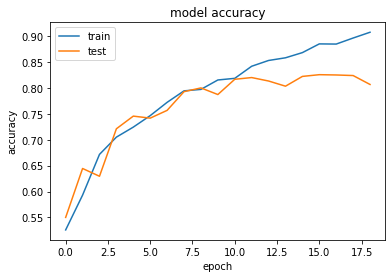

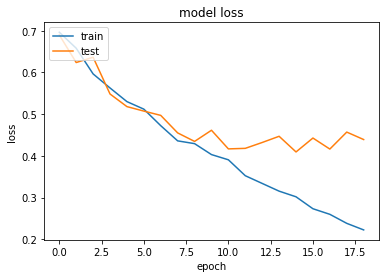

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()